In [1]:
import numpy as np
import matplotlib.pyplot as plt
from classy import Class
import scienceplots
from scipy.interpolate import interp1d

plt.style.use(['science', 'bright', 'vpedre', 'no-latex'])


In [2]:
# deltalna = 7.5e-4
# lna_start = -5
# lna_end = 0.25
# N = int((lna_end - lna_start) / deltalna) + 1

# lna_smg =   np.linspace(lna_start, lna_end, N)
# DeltaM2 =   np.linspace(1e-4, 1e-4, N)
# Dkin =      np.linspace(1e-4, 1e-4, N)
# cs2 =       np.linspace(1., 1., N)

# # Stack the arrays column-wise and save
# data = np.column_stack((lna_smg, DeltaM2, Dkin, cs2))
# np.savetxt("../stable_params_input/gr.dat", data, delimiter=" ")

In [3]:
kk = np.geomspace(1e-4, 10, num=3)

In [ ]:
gral_pars = {
    # Reference Cosmology from EuclidEmuII
    'H0'      : 67,
    'Omega_b' : 0.049,
    'Omega_cdm' : 0.27,

    'A_s' : 2.1e-9,
    'n_s' : 0.96,
    'alpha_s' : 0,
    'k_pivot' : 0.05,

    # 'N_ur' : 0,
    # 'N_ncdm' : 1,
    # 'deg_ncdm' : 3,
    # 'm_ncdm' : 0.058/3,

    'evolver': 0,
    'output':'tCl mPk dTk vTk',
    'z_max_pk': 3,
    'k_output_values': ','.join([str(k) for k in kk])
}

w0wa_class = gral_pars | {
    # MG MODEL
    # Disable cosmological constant 
    'Omega_Lambda': 0,
    # Dark energy fluid parameters
    'w0_fld' : -1.,
    'wa_fld' : 0.,
    # 'cs2_fld':1.,
    # 'root': 'output/w0wa_class',
}

w0wa_mochi = gral_pars | {
    # MG MODEL
    # Disable cosmological constant and DE fluid
    'Omega_Lambda': 0,
    'Omega_fld': 0,
    # Enable mochiclass
    'Omega_smg': -1,
    # Choose the model
    'root': 'output/w0wa_mochi',
    'gravity_model': 'stable_params',
    'smg_file_name': '../stable_params_input/gr.dat',
    'parameters_smg': '1e-10',
    'expansion_model': 'w0wa',
    'expansion_smg': '0.67, -1., 0.', #Lambda, w0, wa
    # CLASS evolver
    'method_qs_smg': 'automatic',
    'method_gr_smg': 'on',
    'z_gr_smg': 99,
}



hs_pars = gral_pars | {
    # MG MODEL
    # Disable cosmological constant and DE fluid
    'Omega_Lambda': 0,
    'Omega_fld': 0,
    # Enable mochiclass
    'Omega_smg': -1,
    # Choose the model
    'gravity_model': 'stable_params',
    'smg_file_name': '../stable_params_input/hs_fr_stable_params_fr0_1em4_n_1_mathematica.dat',
    'parameters_smg': 6.061178756035e-5,
    'expansion_model': 'rho_de',
    'expansion_smg': 0.5, #this value will be overwritten using the closure equation.
    'expansion_file_name' : '../stable_params_input/rho_de_stable_hs_fr_n_1_fr0_1em4_mathematica.dat',
    # CLASS evolver
    'method_qs_smg': 'automatic',
    'method_gr_smg': 'on',
    'z_gr_smg': 99,
    'a_min_stability_test_smg': 1e-2,
}


: 

In [ ]:
cosmologies = {}

# cosmologies['lcdm'].set(gral_pars)
# cosmologies['lcdm'] = Class()
# cosmologies['lcdm'].compute()
# lcdm_bk, lcdm_pt = cosmologies['lcdm'].get_background(), cosmologies['lcdm'].get_perturbations()['scalar']

cosmologies['w0wa_class'] = Class()
cosmologies['w0wa_class'].set(w0wa_class)
cosmologies['w0wa_class'].compute()
w0wac_bk, w0wac_pt = cosmologies['w0wa_class'].get_background(), cosmologies['w0wa_class'].get_perturbations()['scalar']

# cosmologies['w0wa_mochi'] = Class()
# cosmologies['w0wa_mochi'].set(w0wa_mochi)
# cosmologies['w0wa_mochi'].compute()
# w0wam_bk, w0wam_pt = cosmologies['w0wa_mochi'].get_background(), cosmologies['w0wa_mochi'].get_perturbations()['scalar']

# cosmologies['hs_fr'] = Class()
# cosmologies['hs_fr'].set(hs_pars)
# cosmologies['hs_fr'].compute()
# w0wam_bk, w0wam_pt = cosmologies['hs_fr'].get_background(),''#, cosmologies['hs_fr'].get_perturbations()['scalar']

In [ ]:
lcdm_bk_a = 1/(1+lcdm_bk['z'])
w0wac_bk_a= 1/(1+w0wac_bk['z'])
w0wam_bk_a= 1/(1+w0wam_bk['z'])

NameError: name 'w0wac_bk' is not defined

In [ ]:
w0wac_bk.keys()

dict_keys(['z', 'proper time [Gyr]', 'conf. time [Mpc]', 'H [1/Mpc]', 'comov. dist.', 'ang.diam.dist.', 'lum. dist.', 'comov.snd.hrz.', '(.)rho_g', '(.)rho_b', '(.)rho_cdm', '(.)rho_fld', '(.)w_fld', '(.)rho_ur', '(.)rho_crit', '(.)rho_tot', '(.)p_tot', '(.)p_tot_prime', 'gr.fac. D', 'gr.fac. f'])

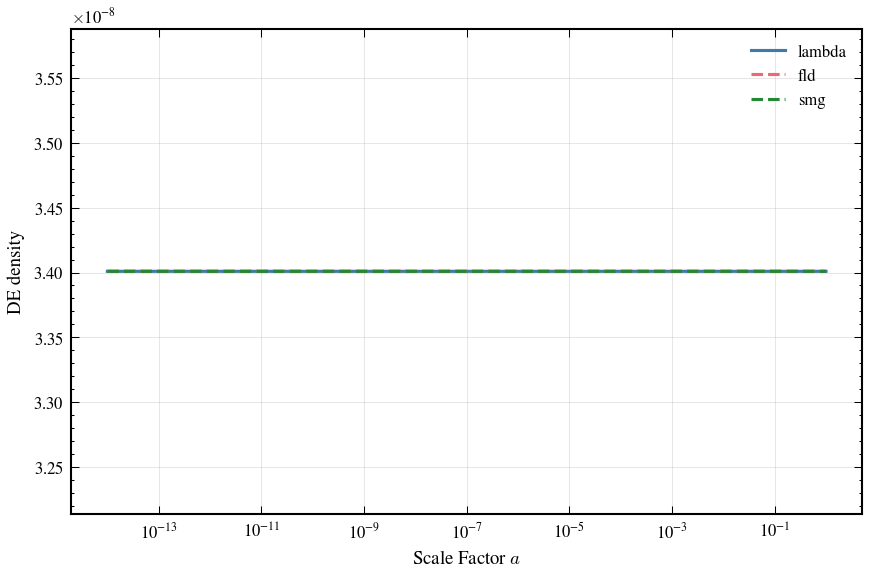

In [ ]:
fig, ax = plt.subplots()

ax.semilogx(lcdm_bk_a, lcdm_bk['(.)rho_lambda'], label='lambda')
ax.semilogx(w0wac_bk_a, w0wac_bk['(.)rho_fld'], '--',label='fld')
ax.semilogx(w0wam_bk_a, w0wam_bk['(.)rho_smg'], '--',label='smg')

# ax.invert_xaxis()
ax.set_ylabel('DE density')
ax.set_xlabel('Scale Factor $a$')
ax.legend()


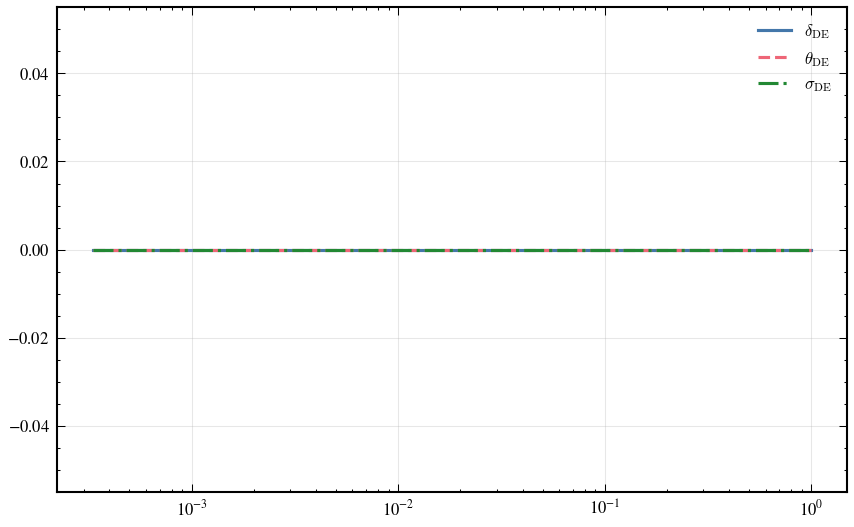

In [ ]:
k_idx =0

fig, ax = plt.subplots()

ax.semilogx(w0wam_pt[k_idx]['a'], w0wam_pt[k_idx]['delta_smg'], label=r'$\delta_\mathrm{DE}$')
ax.semilogx(w0wam_pt[k_idx]['a'], w0wam_pt[k_idx]['theta_smg'], '--', label=r'$\theta_\mathrm{DE}$')
ax.semilogx(w0wam_pt[k_idx]['a'], w0wam_pt[k_idx]['shear_smg'], '-.',label=r'$\sigma_\mathrm{DE}$')
ax.legend()